# **CS-331: Introduction to Artificial Intelligence - Spring 2024**

# Assignment 2: Logistic, Lasso, and Ridge Regression

### Deadline:  12 March 2024 11:55 PM

### Instructions

1. The aim of the assignment is to familiarise you with code implementation of concepts covered in class as well as learn thorough data analysis.

2. All cells must be run once before submission and should $\color{orange}{\text{clearly display the results (graphs/plots/visualizations etc)}}$. Failure to do so will result in deduction of points.

5. Use procedural programming style and comment your code properly. The grading breakdown has $\color{orange}{\text{five}}$ points reserved for well-commented, modular code. 

### Submission Instructions

1. You are required to upload your solutions on LMS in the Assignment tab by the deadline. 

2. The zip file MUST contain your jupyter notebook file (.ipynb) and python script (.py) files.

3. **EACH** file should be named as "Name_RollNumber_PA $\color{orange}{\text{x}}$" where $\color{orange}{\text{x = 2}}$ for this assignment. 

### Late Submission Policy

1. You can submit upto 2 days late with a 10% deduction penalty (from your final obtained marks) for each late day.
2. $\color{red}{\text{No submission}}$ will be accepted after the late days are over.
2. $\color{red}{\text{No submission}}$ will be accepted via email/Slack, unless announced by the course staff beforehand. It is your responsibility to stay updated with any announcements pertaining to the assignment. 

### Plagiarism Policy
All parts of this assignment are to be done $\color{red}{\text{INDEPENDENTLY}}$. The course stuff will refer any case of plagiarism 
from others or the internet immediately to the DC. If you are confused about what
constitutes plagiarism, it is your responsibility to consult with the TAs
in a timely manner.

### Vivas

The teaching staff reserves the right to conduct a viva for any student.  

### Notes
The required packages for this assignment are already present in the first cell.

If you are running the noteook on your PC/laptop, it is STRONGLY advised that you install [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html) and work in a conda environment for this and future assignments. This will go a long way in ensuring you do not get dependency conflicts and your system does not slow down (believe me conflics actually happen and have cost me my sanity).

### Conda Instructions

After installing [conda](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html), open a terminal/command prompt window in the assignment folder and run `conda env create -f environment.yml` command to automatically create an isolated conda environment titled `AI_env` with required packages installed. Then open/restart VSCode to select this environment as the kernel for your notebook. Your first cell should now compile smoothly! 

P.S: You can also check the output of the command `conda list -n AI_env` to see if each required package listed in the `environment.yml` file is present in this environment.

If you are working on Google Colab, you do not need this. In case the `root_mean_squared` function throws an import error, just use the mean squared error with the argument `squared` set to `False`.


In [18]:
# Required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, mean_squared_error # set 'squared' argument to false to get RMSE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso

## Task 1A: Multinomial Logistic Regression

### Problem Introduction

This task is intended to give you a solid understanding of logistic regression.

Logistic regression is primarily employed for classification problems. 

**Binary (or simple) logistic regression** deals with scenarios where the dependent variable has two possible outcomes e.g. yes/no, true/false etc. It models the probability of an observation belonging to one of the two categories.

**Multinomial logistic regression** extends binary logistic regression to handle situations with more than two categories (yes/no/maybe) for the dependent variable. It's useful for classification problems involving multiple classes. In this part, you will be implementing a model that can handle classification in one such multiclass case.

### Dataset
The dataset for this task is provided in a csv titled `star_classification.csv`. It consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. Following is the description of each column in the dataset.

**obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS  

**alpha** = Right Ascension angle (at J2000 epoch)  

**delta** = Declination angle (at J2000 epoch)  

**u** = Ultraviolet filter in the photometric system  

**g** = Green filter in the photometric system  

**r** = Red filter in the photometric system  

**i** = Near Infrared filter in the photometric system  

**z** = Infrared filter in the photometric system  

**run_ID** = Run Number used to identify the specific scan  

**rereun_ID** = Rerun Number to specify how the image was processed  

**cam_col** = Camera column to identify the scanline within the run  

**field_ID** = Field number to identify each field  

**spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)  

**class** = Object class (galaxy, star, or quasar object) $\color{green}{\text{-> This column has the labels that your classifier will predict}}$

**redshift** = Redshift value based on the increase in wavelength  

**plate** = Plate ID, identifies each plate in SDSS  

**MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken  

**fiber_ID** = Fiber ID that identifies the fiber that pointed the light at the focal plane in each observation 

### Task

Your objective will be to build a classifier that can classify the `class` as either `star`, `galaxy` or `quasar` for instances in the test set.

### Note

You are $\color{red}{\text{NOT}}$ allowed to use `scikit-learn` for any part of this task. 

1. To start off, load the csv as a pandas `DataFrame`, visualize it and report its shape.


In [19]:
## YOUR CODE HERE ##
df = pd.read_csv('star_classification.csv')
print("Shape of the DataFrame:",df.shape)
# hape of the DataFrame: (100000, 18)

Shape of the DataFrame: (100000, 18)


2. Now split the dataset into train and test sets. Choose the split ratio based on your intuition and knowledge. 

In [20]:
 ## YOUR CODE HERE ##


df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)


train_ratio = 0.7
test_ratio = 1 - train_ratio


num_train_samples = int(train_ratio * len(df_shuffled))
num_test_samples = len(df_shuffled) - num_train_samples 




train_set =  df_shuffled[:num_train_samples]
test_set  =  df_shuffled[num_train_samples:]


print("Shape of the training set:", train_set.shape)
print("Shape of the testing set:", test_set.shape)
# Shape of the training set: (70000, 18)
# Shape of the testing set: (30000, 18)


Shape of the training set: (70000, 18)
Shape of the testing set: (30000, 18)


Now that you have loaded the data and understood its structure, you will do some preprocessing to get features and class labels/categories for use with your classifier:

1. Make new DataFrames labelled `X_train` and `X_test` that have the feature columns only. Remove any features that you consider irrelevant for training the classifier. You could use trial and error to observe which set of attributes give you the best accuracy. (HINT: Check the dataset description given earlier to decide which columns might be dropped). 

2. Normalize both train and test feature matrices. (Caveat: make sure to normalize test set appropriately). 

3. Report normalized `X_train` and `X_test` shape and state what each dimension of shape represents. 

4. Incorporate a bias vector of appropriate shape (determine this yourself) to the normalized feature matrices.

5. Report first instance of normalized train and test feature matrices before and after adding the bias vector.

In [21]:
 ## YOUR CODE HERE ##
def normalize(input) :
    # mean_values = np.mean(input, axis=0)
    # max_values = np.max(input, axis=0)
    # min_values = np.min(input, axis=0)
    # normalized_input = (input - mean_values) / (max_values - min_values)
    mean = np.mean(input, axis=0)
    std_dev = np.std(input, axis=0)
    normalized_input = (input - mean) / std_dev
    return  normalized_input
    

X_train = train_set[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']]
x_test =  test_set[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z','redshift']]



X_train_normalized = normalize(X_train) 
X_test_normalized =  normalize(x_test)


print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)

##############################################
# shapes 
###############################################
# Shape of X_train_normalized: (70000, 8)
# Shape of X_test_normalized: (30000, 8) 

############################################

# dimensions represents that there are total 70000 samples with 8 features in train data similarly 
# there are 30000 features with 8 features in train data


ones_column = np.ones((X_train_normalized.shape[0], 1))
X_train_with_bias = np.concatenate((ones_column,X_train_normalized ), axis=1)
ones_column = np.ones((X_test_normalized.shape[0], 1))
X_test_with_bias = np.concatenate((ones_column,X_test_normalized ), axis=1)

print("Shape of X_train_bias:", X_train_with_bias.shape)
print("Shape of X_test_bias:", X_test_with_bias.shape) 

##############################################
# To Vizaulize more clearly , we can just uncomment the below 4 print statement 
##############################################
#print("first 10  X_train", X_test_normalized[:10] )
#print("first 10  X_train_bias:", X_train_with_bias[:10])
#print("first 10  X_test_bias:", X_test_with_bias[:10])
#print("first 10  X_train", X_train_normalized[:10] )


#####################################
# first 10 of train before bias 
###################################


# 0 -1.668373 -1.042755  0.036968  0.038635  0.452936  0.296878  0.013399   
# 1  0.643585 -0.916283 -0.107332 -0.097400 -1.733854 -1.578799 -0.062377   
# 2 -1.524019 -1.167673 -0.098667 -0.094700 -1.738388 -1.614653 -0.064309   
# 3  0.721627 -0.674643  0.080828  0.032323  0.987284  1.266285  0.070388   
# 4 -1.648274 -1.495545  0.048329  0.034573  0.568410  0.656226  0.035657   
# 5  0.049296  1.383473  0.013528  0.031595  0.324168  0.189381  0.012114   
# 6 -0.288776  0.778120 -0.078233 -0.070062 -1.256563 -1.186053 -0.046624   
# 7  0.119733  1.757871 -0.014733  0.008324  0.651435  1.169004  0.045478   
# 8 -1.453277 -1.254792 -0.030385 -0.024786 -0.256631 -0.106654  0.000522   
# 9  0.239566  0.234354  0.082249  0.046076  0.631437  0.349200  0.017420   

########################################################
# first 10 of test before bias 
###############################################


# 70000  0.461167  0.907145  0.461620  0.726012  0.489482  0.327169  0.257374   
# 70001  0.603379  0.638935  0.194180 -0.066459 -0.445228 -0.480233 -0.475697   
# 70002 -0.433869  1.435653 -0.061340  0.159660  0.733517  1.008630  0.931663   
# 70003  0.246745 -0.733036 -0.855580 -1.121597 -1.202275 -1.189977 -1.194874   
# 70004  0.784430 -0.093767 -0.061610 -0.376539 -0.674888 -0.727765 -0.760606   
# 70005  0.517201 -1.217576  0.586356  0.787555  0.356730  0.187772  0.077892   
# 70006  0.153482  1.313349 -0.273953  0.130789  0.562330  0.858887  0.764008   
# 70007 -1.748795 -1.283620 -0.405929 -0.157313  0.085672  0.206329  0.210469   
# 70008 -0.284391  1.687706  0.312809  0.473350  0.148969 -0.019014 -0.055522   
# 70009  0.555907  1.311986  0.912736  1.314058  1.092831  0.884248  0.669345   


#################################################

# first 10 of train after bias 
####################################################
# first 10  X_train_bias: [[ 1.00000000e+00 -1.66837335e+00 -1.04275524e+00  3.69676292e-02
#    3.86353704e-02  4.52936096e-01  2.96878216e-01  1.33985023e-02
#   -9.67247897e-02]
#  [ 1.00000000e+00  6.43584654e-01 -9.16283481e-01 -1.07332103e-01
#   -9.74000676e-02 -1.73385411e+00 -1.57879922e+00 -6.23765838e-02
#   -7.88760466e-01]
#  [ 1.00000000e+00 -1.52401913e+00 -1.16767254e+00 -9.86668817e-02
#   -9.46997412e-02 -1.73838802e+00 -1.61465256e+00 -6.43088128e-02
#   -7.89226567e-01]
#  [ 1.00000000e+00  7.21626925e-01 -6.74642699e-01  8.08284920e-02
#    3.23229190e-02  9.87284147e-01  1.26628507e+00  7.03879120e-02
#   -7.89630891e-01]
#  [ 1.00000000e+00 -1.64827449e+00 -1.49554543e+00  4.83285096e-02
#    3.45731471e-02  5.68410416e-01  6.56225935e-01  3.56571256e-02
#   -7.89418410e-01]
#  [ 1.00000000e+00  4.92956433e-02  1.38347262e+00  1.35284668e-02
#    3.15954313e-02  3.24167710e-01  1.89380841e-01  1.21144829e-02
#   -1.01606460e-01]
#  [ 1.00000000e+00 -2.88776466e-01  7.78120480e-01 -7.82333213e-02
#   -7.00624594e-02 -1.25656314e+00 -1.18605255e+00 -4.66237997e-02
#   -7.02142296e-01]
# ...
#   -6.44213188e-01]
#  [ 1.00000000e+00  2.39565584e-01  2.34353912e-01  8.22485362e-02
#    4.60761000e-02  6.31437136e-01  3.49200401e-01  1.74196702e-02
#   -1.34916632e-02]]



#############################################################
# first 10 of x_test_bias 

############################################################

# [[ 1.          0.46116655  0.90714538  0.46161994  0.7260123   0.48948197
#    0.32716945  0.25737406 -0.04019025]
#  [ 1.          0.60337949  0.63893502  0.19417979 -0.06645924 -0.4452276
#   -0.48023319 -0.47569737 -0.36389201]
#  [ 1.         -0.43386879  1.43565329 -0.06134028  0.15965956  0.73351706
#    1.00862982  0.93166348  2.43363213]
#  [ 1.          0.24674536 -0.73303578 -0.8555797  -1.12159698 -1.20227523
#   -1.18997708 -1.19487425 -0.64341543]
#  [ 1.          0.78443002 -0.09376669 -0.06161038 -0.37653911 -0.67488775
#   -0.72776508 -0.76060617 -0.47212463]
#  [ 1.          0.51720101 -1.21757599  0.58635568  0.78755502  0.35673028
#    0.18777209  0.07789202 -0.17338067]
#  [ 1.          0.15348179  1.31334926 -0.27395338  0.13078905  0.56233003
#    0.85888719  0.76400791  2.50792759]
#  [ 1.         -1.74879527 -1.28361963 -0.40592884 -0.15731338  0.0856716
#    0.20632889  0.21046937 -0.57710585]
#  [ 1.         -0.28439148  1.68770554  0.31280937  0.47335008  0.14896864
#   -0.01901428 -0.0555216  -0.12971947]
#  [ 1.          0.55590736  1.31198606  0.91273646  1.31405833  1.09283127
#    0.88424815  0.66934533  0.20765831]]







Shape of X_train_normalized: (70000, 8)
Shape of X_test_normalized: (30000, 8)
Shape of X_train_bias: (70000, 9)
Shape of X_test_bias: (30000, 9)


6. Extract the class labels from both train and test dataset, and convert to NumPy array for faster preprocessing. Label these `y_train` and `y_test`. (HINT: Check dataset description to see which column to extract).

7. Report `y_train` and `y_test` shape and state what each dimension of shape represents.

In [22]:
 ## YOUR CODE HERE ##
y_train = np.array(train_set[['class']])
y_test = np.array(test_set[['class']])
#print(y_train)

#it is a column vector
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape) 
##############################################
#shape 
############################################## 
# Shape of y_train: (70000, 1)
# Shape of y_test: (30000, 1)

##############################################
# these shapes represents that its a column vector 
# in case of train its 70000 samples with with one feature 

Shape of y_train: (70000, 1)
Shape of y_test: (30000, 1)


As you would have seen, `y_train` and `y_test` have class labels/categories in string format right now. However, many machine learning algorithms, such as logistic regression, support only numerical input features. They are designed to perform mathematical operations on numerical data, such as addition, subtraction, and multiplication. Therefore, we will first encode these string labels as integers, and then one-hot encode them.

7. Create a mapping that converts the current class labels to integers e.g. Class1: 0, Class2: 1 etc

8. Use the mapping to create updated `y_train` and `y_test`. 

In [23]:

class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}


y_train_int = np.zeros_like(y_train, dtype=int)
for i, label in enumerate(y_train):
    label_str = label.item() 
    y_train_int[i] = class_mapping[label_str]


y_test_int = np.zeros_like(y_test, dtype=int)
for i, label in enumerate(y_test):
    label_str = label.item()  # Convert numpy scalar to Python scalar
    y_test_int[i] = class_mapping[label_str]

# print("Shape of y_train_int:", y_train_int)
# print("Shape of y_test_int:", y_test_int)


Currently, our updated `y_train` and `y_test` are represented by integers. However, using this ordinal encoding (assigning integers to categories) may introduce an inherent order or magnitude between categories that does not exist in the original data. 

One-hot encoding avoids this issue by representing each category as a separate binary variable, thereby treating them as equally important and removing any ordinal bias. In logistic regression, when dealing with multiple classes, one-hot encoding enables the model to predict probabilities for each class independently. Each class is represented by its own binary variable, and the model learns separate coefficients for each class, allowing it to make predictions across multiple classes.

Example:  If `y_train = [0,0,1,2]` then one-hot encoded representation of this vector would be: `[[1,0,0], [1,0,0], [0,1,0], [0,0,1]]`

9. Write a function to one-hot encode the labels.

10. Call the function to get one-hot encoded labels for both train and test sets.

In [24]:
 ## YOUR CODE HERE ##



def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1
    return one_hot_labels

num_classes = len(class_mapping)
y_train_one_hot = one_hot_encode(y_train_int, num_classes)
y_test_one_hot = one_hot_encode(y_test_int, num_classes)
#print(y_train_one_hot)


Report first 10 instances of:

1. Your original `y_train` and `y_test` arrays.
2. Your integer-encoded `y_train` and `y_test` arrays. 
3. Your one-hot encoded `y_train` and `y_test` arrays. 

(Note how reporting this can help you understand your arrays properly and verify that they are correctly structured too)

In [25]:
## YOUR CODE HERE ##
##############################################
# to see more clearly we can uncomment this print statements
############################################## 
#print("Original y_train:",y_train[:10]) 
#print("Original y_test:",y_test[:10])
#print("Integer-encoded y_train:",y_train_int[:10])
#print("Integer-encoded y_test:",y_test_int[:10])
#print("One-hot encoded y_train:",y_train_one_hot[:10])
#print("\nOne-hot encoded y_test:",y_test_one_hot[:10])


##############################################
# first 10 original y_train 
############################################## 

#  ['STAR']
#  ['STAR']
#  ['STAR']
#  ['STAR']
#  ['QSO']
#  ['GALAXY']
#  ['QSO']
#  ['GALAXY']
#  ['GALAXY']]

##############################################
# fist 10 original y_test
##############################################
#  [['GALAXY']
#  ['GALAXY']
#  ['QSO']
#  ['GALAXY']
#  ['GALAXY']
#  ['GALAXY']
#  ['QSO']
#  ['GALAXY']
#  ['GALAXY']
#  ['GALAXY']]


##############################################
# fist 10  Integer-encoded y_train
##############################################
# [[1]
#  [0]
#  [0]
#  [0]
#  [0]
#  [2]
#  [1]
#  [2]
#  [1]
#  [1]]

##############################################
# fist 10  Integer-encoded y_test
##############################################

# [[1]
#  [1]
#  [2]
#  [1]
#  [1]
#  [1]
#  [2]
#  [1]
#  [1]
#  [1]]

##############################################
# fist 10  One-hot encoded y_train
##############################################

# [[0. 1. 0.]
#  [1. 0. 0.]
#  [1. 0. 0.]
#  [1. 0. 0.]
#  [1. 0. 0.]
#  [0. 0. 1.]
#  [0. 1. 0.]
#  [0. 0. 1.]
#  [0. 1. 0.]
#  [0. 1. 0.]]

##############################################
# fist 10  One-hot encoded y_test
##############################################

# [[0. 1. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]
#  [0. 1. 0.]
#  [0. 1. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]
#  [0. 1. 0.]
#  [0. 1. 0.]
#  [0. 1. 0.]]






You are now ready to use the above matrices/arrays to implement your classifier and evaluate it on the test set. 
Please feel free to create as many cells as you need for modularity. 

Remember there are 5 points for well-commented/structured code. 

### Implement the following:

 * Softmax function
 * Cross-entropy loss function
 * Batch Gradient Descent function
 * Prediction function that predicts output class using learned logistic regression (choose the highest probability class)
 * Evaluation function that calculates classification accuracy on test set 
 * Report plots with no. of iterations/epochs on x-axis and training/validation loss on y-axis.

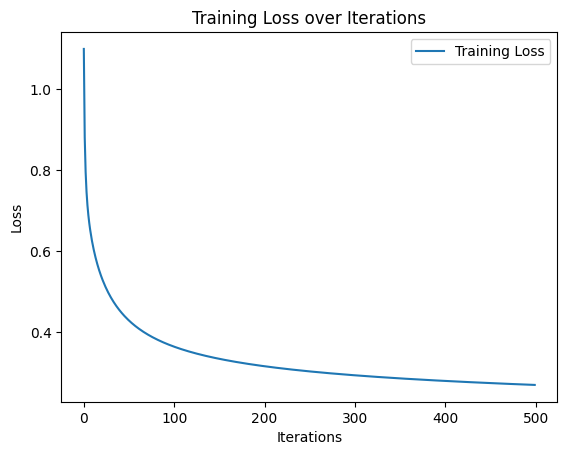

Training accuracy: 92.51142857142857
Test accuracy:  79.41666666666667


In [26]:
 ## YOUR CODE HERE ##
def softmax(z):
   exp_z = np.exp(z)
   return exp_z / np.sum(exp_z, axis=1, keepdims=True)

   
def cross_entropy_loss(y_pred,y):

    # print(y.shape)
    # print(y_pred.shape)
     
    num_samples = y_pred.shape[0]
    loss = -np.sum(y * np.log(y_pred + 1e-15)) / num_samples
    return loss

def batch_gradient_descent(X,y_train_one_hot ,learning_rate, epochs):
    losses = []
    num_samples, num_features = X.shape
    num_classes = y_train_one_hot.shape[1] 
    #print(num_classes) 
    weights = np.zeros((num_features, num_classes))
   # print(weights.shape,"print_shape")
    #print(X.shape)
    # print(y_train_one_hot.shape)
    #print(weights.shape)
    for epoch in range(epochs):
       
        z = np.dot(X, weights)
       
        y_pred = softmax(z)
     
        
        loss = cross_entropy_loss( y_pred,y_train_one_hot)
        losses.append(loss)
     
        gradient = np.dot(X.T, (y_pred - y_train_one_hot )) / num_samples
        weights -= learning_rate * gradient
        
     
       
            
    return weights, losses
def predict(X, weights):
    z = np.dot(X, weights)
    probabilities = softmax(z)
    return np.argmax(probabilities, axis=1)

def evaluate_accuracy(y_true, y_pred):
    num_correct = np.sum(y_true == y_pred)
    accuracy = num_correct / len(y_true)
    return accuracy*100 

def plot_loss(losses):
    plt.plot(range(len(losses)), losses, label='Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Training Loss over Iterations')
    plt.legend()
    plt.show()

learning_rate = 1
epochs= 500


weights, losses = batch_gradient_descent(X_train_with_bias,y_train_one_hot, learning_rate, epochs)


plot_loss(losses)


y_pred_train = predict(X_train_with_bias, weights)
y_pred_test = predict(X_test_with_bias, weights)


train_accuracy = evaluate_accuracy(np.argmax(y_train_one_hot, axis=1), y_pred_train)
test_accuracy = evaluate_accuracy(np.argmax(y_test_one_hot, axis=1), y_pred_test)

print("Training accuracy:",train_accuracy)
print("Test accuracy: ",test_accuracy) 



#######################################
# Training accuracy: 92.51142857142857
# Test accuracy:  79.41666666666667
#######################################



## Task 1B: Reflection Questions

#### 1. How did normalization help in our case? Why did we need it?  

Normalization helps in our case by ensuring that features are on a similar scale, which can help improve the convergence of gradient-based optimization algorithms such as gradient descent. In our case, normalization was necessary because the features in the dataset might have had different ranges and units. For example, features like alpha, delta, u, g, r, i, and z could have different scales, and normalizing them ensures that they contribute equally to the model's learning process.

$\color{green}{\text{Answer:}}$ Double click `here` to answer.
#### 2. What function instead of Softmax would we have used if this was a binary classification problem? How does softmax differ from it? 
If this were a binary classification problem, we would have used the sigmoid function (also known as the logistic function) instead of Softmax. The sigmoid function maps any real-valued number to the range [0, 1], making it suitable for binary classification tasks where the output represents the probability of the positive class.

Softmax, on the other hand, is used for multi-class classification problems where there are more than two classes. Softmax calculates the probabilities of each class being the correct one and ensures that the sum of these probabilities across all classes is equal to 1. This allows Softmax to handle multiple classes simultaneously and produce a probability distribution over all classes.

$\color{green}{\text{Answer:}}$ Double click `here` to answer.

## Task 2: Regularization - Ridge Regression

### Problem Introduction

This task is intended to familiarise you with regularization in the context of linear regression **(recall that you have implemented Linear Regression in PA1, it will be needed again here)**.

While training regression models, it is useful to ensure that there are some constraints on the weights learnt. These constraints are usually defined by some kind of penalty function included in the overall loss function. Generally, penalizing the norm of our weights means that during the training process, our model will prefer smaller values of weights.

We shall look at two types of regularization techniques. The first is Ridge Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}(y - X\mathbf{w})^{2} + \lambda (\mathbf{w})^{2}
\end{equation*}

The second is Lasso Regression:
\begin{equation*}
\mathcal{L} = \frac{1}{N}(y - X\mathbf{w})^{2} + \lambda |\mathbf{w}|
\end{equation*}

The L2 penalty on the weights penalizes larger values more than smaller ones while the L1 penalty penalizes all kinds of weights equally. The L1 penalty is also used to promote sparsity in the learnt weights (i.e. make certain weights which do not have a strong correlation with the data).

Please also note, for regularization to function properly, input **data must be normalized** to have zero mean and unit variance. We will be using StandardScaler() for it.

### Dataset

The dataset for this part is provided in a csv titled `auto_mpg.csv`. 

### Task

Your task is to implement a linear regression model to predict car `displacement` using the feature `mpg`. You will test different values of regularization parameter (`lambd`) to see which value gives the lowest training and testing loss.

1. To begin, load the `auto_mpg_dataset.csv` dataset into a pandas DataFrame, visualize it and report its shape.

In [27]:
## YOUR CODE HERE ##



df_2 = pd.read_csv('auto_mpg.csv')
print("shape: ",df_2.shape)
#shape:  (398, 9) 





shape:  (398, 9)


2. Extract the columns `mpg` and `displacement` and normalize these features by using a builtin function `StandardScaler()`. (You may need to clean the data for Null/NAN values before normalizing).

In [28]:
## YOUR CODE HERE ##
df_2.dropna(subset=['mpg', 'displacement'], inplace=True)
x = np.array(df_2[['mpg']])
y = np.array(df_2[['displacement']])

# print("shape: ",x.shape)
# print("shape: ",y.shape)

scaler = StandardScaler()

# Fit and transform the data
x_scaled = scaler.fit_transform(x)
#y_scaled = scaler.fit_transform(y)









3. Split your data into train and test sets. You may make use of the `train_test_split` function from the scikit-learn library for this. The documentation for this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split). Make sure that you use a 80-20 split meaning 80% should be the training set and 20% should be for the test set.

In [29]:
## YOUR CODE HERE ##


# Split the data into train and test sets with an 80-20 split
df_2.dropna(subset=['mpg', 'displacement'], inplace=True)

df_shuffled = df_2.sample(frac=1, random_state=42).reset_index(drop=True)


train_ratio = 0.8
test_ratio = 1 - train_ratio


num_train_samples = int(train_ratio * len(df_shuffled))
num_test_samples = len(df_shuffled) - num_train_samples 




train_set =  df_shuffled[:num_train_samples]
test_set  =  df_shuffled[num_train_samples:]


X_train_1 = train_set[['mpg']]
X_train_new =  scaler.fit_transform(X_train_1)
X_test_1 = test_set[['mpg']]
X_test_new = scaler.fit_transform(X_test_1)

y_train_1 =  np.array(train_set[['displacement']])
y_train_new = scaler.fit_transform(y_train_1)
y_test_1 = np.array(test_set[['displacement']])
y_test_new = scaler.fit_transform(y_test_1)




print("Shape of X_train:", X_train_new.shape)
print("Shape of X_test:", X_test_new.shape)
print("Shape of y_train:", y_train_new.shape)
print("Shape of y_test:", y_test_new.shape)


Shape of X_train: (318, 1)
Shape of X_test: (80, 1)
Shape of y_train: (318, 1)
Shape of y_test: (80, 1)


You shall now use gradient descent and analytical solution to fit model parameters. To do so, you must complete the `LinearRegression` class provided. This class should work for Ridge Regression (HINT : Gradient Calculations are different). 

Furthermore, it should be able to compute solutions `analytically` (also provided in sir's notes) as below

\begin{equation*}
(X^T X)^{-1} \cdot (X^T Y)
\end{equation*} 

as well as via gradient descent. 

A function to generate the feature matrix for a specified polynomial degree has been provided.

In [30]:
## YOUR CODE HERE ##


class LinearRegression:
    """
    A class to perform linear regression

    Methods:
        __init__(self, lambd, degree)                                                  : Initializes the LinearRegression instance.
        _generate_X(self, x)                                                           : Generate the matrix X containing samples of data up to the degree specified.
                                                                                         Bias term is included (i.e., the first column is all ones).
        analytical_solution(self, x, y)                                                : Find the analytical solution for model weights which minimizes mean square error
        gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4) : Find a gradient descent based solution for model weights which minimizes mean square error.
    """
    def __init__(self, lambd, degree):
        self.lambd = lambd
        self.degree = degree

    def _generate_X(self, x):
        """
        Generate the matrix X containing samples of data up to the degree specified.
        Bias term is included (i.e., first column is all ones).

        Args:
            x (numpy.ndarray): Input data of shape (num_points, 1)

        Returns:
            X (numpy.ndarray): Matrix of shape (num_points, degree+1)
        """
        polynomial_features = PolynomialFeatures(degree=self.degree)
        X = polynomial_features.fit_transform(x)
        return X

    def analytical_solution(self, x, y): 
        """
        Find the analytical solution for model weights which minimizes mean square error

        Args:
            x (numpy.ndarray): x values of data
            y (numpy.ndarray): y values of data

        Returns:
            w (numpy.ndarray): list of optimal weights for regression
        """
     
        x_data = self._generate_X(x)
        X_transpose = np.transpose(x_data)
        XtX = np.dot(X_transpose, x_data)
        XtX_inv = np.linalg.inv(XtX)
        xty = np.dot(X_transpose,y)
        resullt = np.dot(XtX_inv,xty)
        return resullt

    def gradient_descent_solution(self, x, y, learning_rate, num_iterations, tol=1e-4):
        """
        Find a gradient descent based solution for model weights which minimizes mean square error.

        Args:
            x (numpy.ndarray)    : x values of data
            y (numpy.ndarray)    : y values of data
            learning_rate (float): Learning rate for each gradient descent step
            num_iterations (int) : Number of iterations to perform before returning
            tol (float)          : value of epsilon s.t. when ||grad(f(x))||_{2} < epsilon, the algorithm terminates

        Returns:
            w (numpy.ndarray): list of optimal weights for regression
        """
        
        num_samples, num_features = x.shape
        w = np.zeros((num_features,1))

        for i in range(num_iterations):
            predictions = np.dot(x,w)
            # print("shape of y : ",y.shape)
            # print("shape of  p: ",predictions.shape)
            # print("shape of w",w.shape)
          #  error = predictions - y 
           # print("check",error.shape)
            gradient = (1 / num_samples) * x.T.dot(predictions - y) + 2 * self.lambd * w
            w -= learning_rate * gradient

            if (np.linalg.norm(gradient)**2) < tol:
             break

        return w


5. Use the LinearRegression class you have implemented above to compute weights using analytical and gradient descent solutions for each value of lambd. Using these computed weights, predict the displacement (this will be Y_predicted). Also plot the curves showing training and testing RMSE`(Y - Y_predicted)^2` for each value of `lambd`. We'll be taking a polynomial of `degree 3 with 100 values of lambda ranging from 0 to 10`.

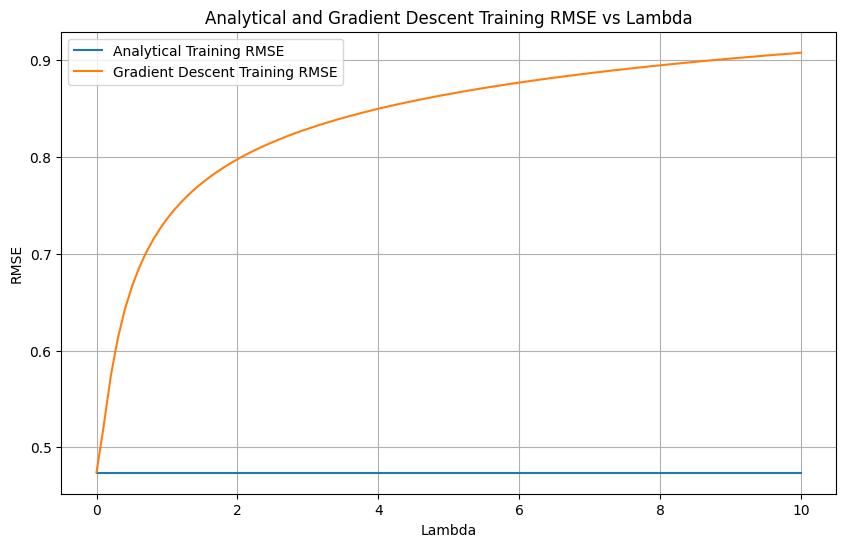

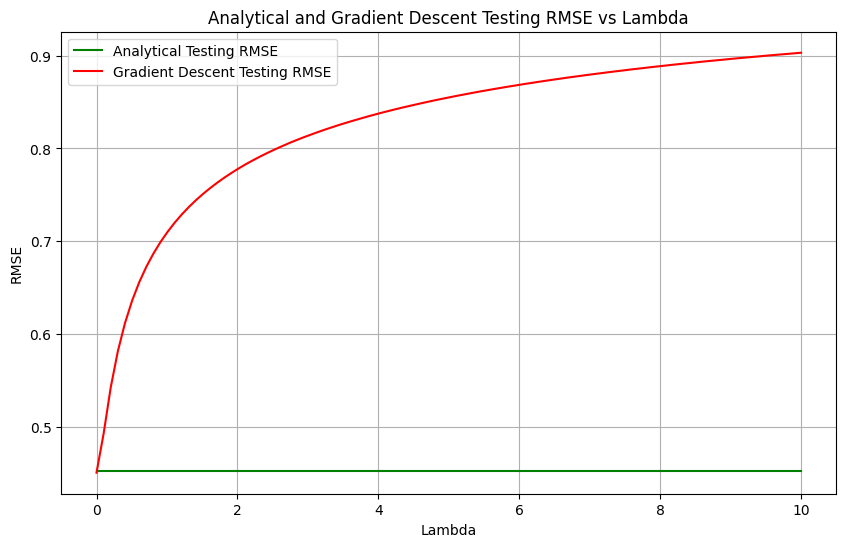

In [31]:

def generate_polynomial_features(X, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    return X_poly

# Define parameters
degree = 3
num_lambdas = 100
lambdas = np.linspace(0, 10, num_lambdas)
X_train_poly = generate_polynomial_features(X_train_new, degree)
X_test_poly = generate_polynomial_features(X_test_new, degree)

train_errors_analytical = []
test_errors_analytical = []
train_errors_gradient = []
test_errors_gradient = []

for lambd in lambdas:
    # Train the model with analytical solution
    model_analytical = LinearRegression(lambd=lambd, degree=3)
    weights_analytical_train = model_analytical.analytical_solution(X_train_new, y_train_new)
    y_train_predicted_analytical = np.dot(X_train_poly, weights_analytical_train)
    train_rmse_analytical = np.sqrt(mean_squared_error(y_train_new, y_train_predicted_analytical))
    y_test_predicted_analytical = np.dot(X_test_poly, weights_analytical_train)
    test_rmse_analytical = np.sqrt(mean_squared_error(y_test_new, y_test_predicted_analytical))
    train_errors_analytical.append(train_rmse_analytical)
    test_errors_analytical.append(test_rmse_analytical)

    # Train the model with gradient descent solution
    model_gradient = LinearRegression(lambd=lambd, degree=3)
    weights_gradient_train = model_gradient.gradient_descent_solution(X_train_poly, y_train_new, learning_rate=0.01, num_iterations=1000)
    #print(weights_gradient_train)
    y_train_predicted_gradient = np.dot(X_train_poly, weights_gradient_train)
    train_rmse_gradient = np.sqrt(mean_squared_error(y_train_new, y_train_predicted_gradient))
    y_test_predicted_gradient = np.dot(X_test_poly, weights_gradient_train)
    test_rmse_gradient = np.sqrt(mean_squared_error(y_test_new, y_test_predicted_gradient))
    train_errors_gradient.append(train_rmse_gradient)
    test_errors_gradient.append(test_rmse_gradient)


plt.figure(figsize=(10, 6))
# print(lambdas.shape)
# print(len(train_errors_analytical))
plt.plot(lambdas, train_errors_analytical, label='Analytical Training RMSE')
plt.plot(lambdas, train_errors_gradient, label='Gradient Descent Training RMSE')

plt.title('Analytical and Gradient Descent Training RMSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the curves for gradient descent solution
plt.figure(figsize=(10, 6))
plt.plot(lambdas, test_errors_analytical, label='Analytical Testing RMSE',color = 'green')
plt.plot(lambdas, test_errors_gradient, label='Gradient Descent Testing RMSE',color = 'red')
plt.title('Analytical and Gradient Descent Testing RMSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


6. Plot the output of the model with the least validation RMSE overlaid on top of the original data (mpg vs displacement).

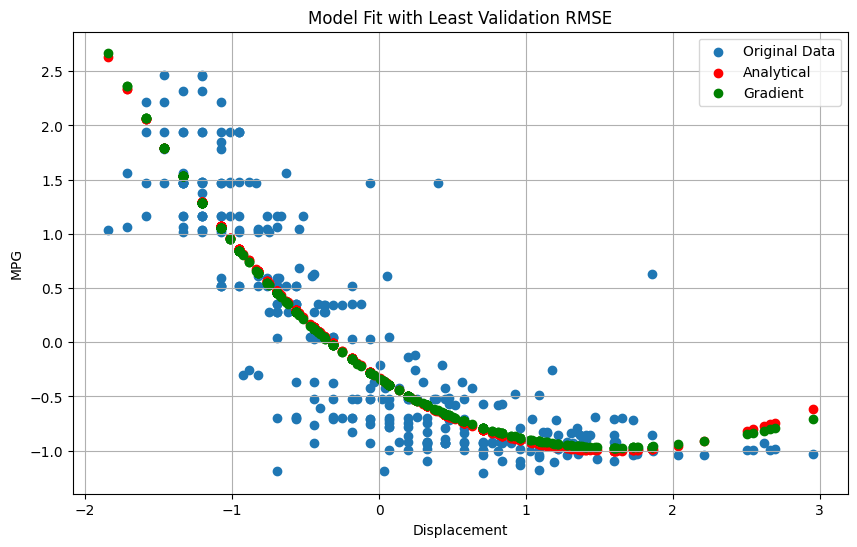

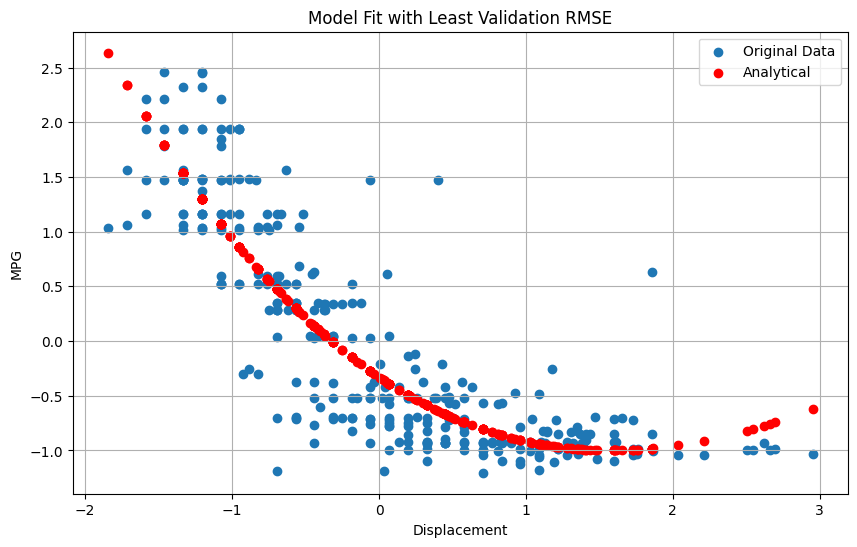

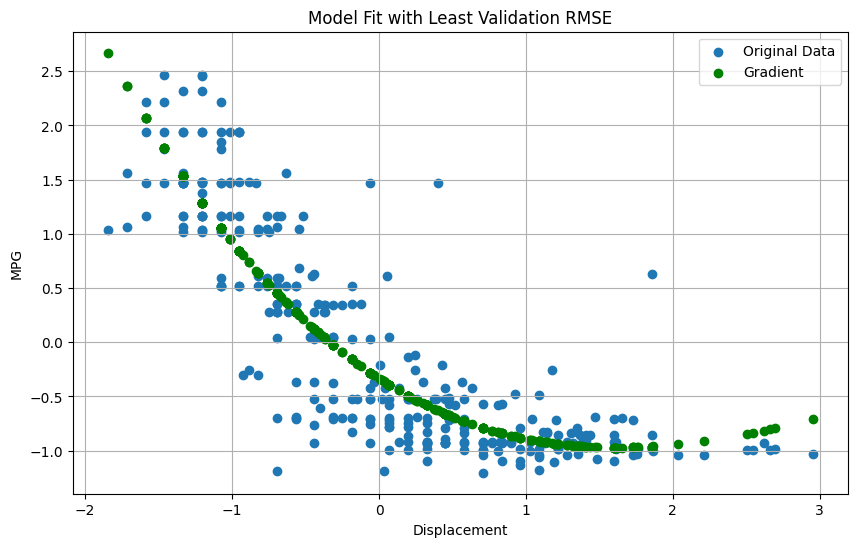

In [32]:
## YOUR CODE HERE ##
min_rmse_index = np.argmin(test_errors_gradient)
optimal_lambda = lambdas[min_rmse_index]
optimal_model = LinearRegression(lambd=optimal_lambda, degree=3)
weights_analytical = optimal_model.analytical_solution(X_train_new, y_train_new)
x_poly = optimal_model._generate_X(X_train_new)
#print(X_train_new.shape,x_poly.shape)
original_data_pred_analytical = np.dot(x_poly, weights_analytical)
weights_gradient = optimal_model.gradient_descent_solution(x_poly,y_train_new,learning_rate=0.01,num_iterations=1000)
original_data_pred_gra = np.dot(x_poly, weights_gradient)


plt.figure(figsize=(10, 6))
#print(X_train_new.shape,y_train_new.shape)
#print(train_errors_analytical)
plt.scatter(X_train_new, y_train_new, label='Original Data')
plt.scatter(X_train_new, original_data_pred_analytical, color='red', label='Analytical')
plt.scatter(X_train_new, original_data_pred_gra, color='green', label='Gradient')
plt.title('Model Fit with Least Validation RMSE')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show() 


#####################################################################################
# To see seprate graphs of orginal vs Analytical and orgional vs Gradient  
#####################################################################################
plt.figure(figsize=(10, 6))
plt.scatter(X_train_new, y_train_new, label='Original Data')
plt.scatter(X_train_new, original_data_pred_analytical, color='red', label='Analytical')
plt.title('Model Fit with Least Validation RMSE')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show() 

plt.figure(figsize=(10, 6))
plt.scatter(X_train_new, y_train_new, label='Original Data')
plt.scatter(X_train_new, original_data_pred_gra, color='green', label='Gradient')
plt.title('Model Fit with Least Validation RMSE')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show() 




6. What do you notice about the effect of varying $\lambda$ on dataset (the effect on the training/testing loss)?       
$\color{green}{\text{Answer:}}$ Double click `here` to answer.

As lambda increases, the training loss tends to increase. This is because higher values of lambda impose stronger regularization penalties on the model weights, leading to a more constrained model with simpler coefficients. Consequently, the model may underfit the training data, resulting in higher training loss.


7. If you were to vary `learning rate` on dataset, what effect do you think if would have on the training/testing loss?                                                               
$\color{green}{\text{Answer:}}$ Double click `here` to answer. 
If the learning rate is too small, the model may converge very slowly, requiring a large number of iterations to reach an optimal solution. This can result in a higher training loss as the model takes longer to learn the underlying patterns in the data.
On the other hand, if the learning rate is too large, the model may oscillate around the optimal solution or even diverge. This can lead to unstable training behavior and an increase in the training loss.

## Task 3: Regularization - Lasso Regression (with sci-kit learn)

Now we'll be using the scikit-learn library to perform Lasso regression using different values of alpha to learn the relationship between $y$: fuel average / mpg of different cars and $\mathbf{x}$: displacement in the `auto_mpg` dataset. You may create your own version of the `generate_X` function from the class implemented above to experiment with models that are non-linear _in features_. Also, do not forget to normalize your input data. A good way to implement all of these in one go is to make a scikit-learn [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Alpha values list is given.

1. Print the coefficients learnt by Lasso model for each value of alpha given. Is there anything particular about the change in coefficients learnt by Lasso regression with different values of alpha?


In [33]:


alpha_values = [10 ,1, 0.1, 0.01, 0.001, 0.0001]

# Create a pipeline for Lasso regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),          
    ('poly_features', PolynomialFeatures()),
    ('lasso', Lasso())                     
])


for alpha in alpha_values:
   
    lasso_pipeline.set_params(lasso__alpha=alpha)
    
    
    lasso_pipeline.fit(y_train_new, X_train_new)
    
 
    print("Alpha:",alpha)
    print("Coefficients:")
    print(lasso_pipeline.named_steps['lasso'].coef_)
    print() 

# As the value of alpha increases, Lasso regression tends to shrink the coefficients more aggressively towards zero. This leads to sparser solutions 
# where many coefficients become exactly zero. In your case, as alpha increases from 0.01 to 100, you can observe that the coefficients gradually decrease
# and eventually become zero. This sparsity property of Lasso regression allows for automatic feature selection, where less important features are
# effectively ignored by the model.

# Regularization Strength: The magnitude of the coefficients decreases as the value of alpha increases. This is evident from the fact that
# the coefficients learned by Lasso regression become smaller and approach zero with higher values of alpha. Higher values of alpha impose
#  stronger regularization penalties, which constrain the model from fitting the training data too closely. Consequently, the model becomes
#  simpler with fewer parameters, resulting in more regularization and smaller coefficients.


Alpha: 10
Coefficients:
[ 0. -0. -0.]

Alpha: 1
Coefficients:
[ 0. -0. -0.]

Alpha: 0.1
Coefficients:
[ 0.         -0.71180044  0.01076402]

Alpha: 0.01
Coefficients:
[ 0.         -0.95371169  0.22772014]

Alpha: 0.001
Coefficients:
[ 0.         -0.97793328  0.2494336 ]

Alpha: 0.0001
Coefficients:
[ 0.         -0.98037208  0.25161469]



2. We will be using the coefficents (computed above) and see which of them provide us with minimum RMSE (same as we computed for ridge regression). Plot the output of the model (Lasso) with the least validation RMSE overlaid on top of the original data. Do not forget to report both training and testing RMSE plots for the values of alpha.

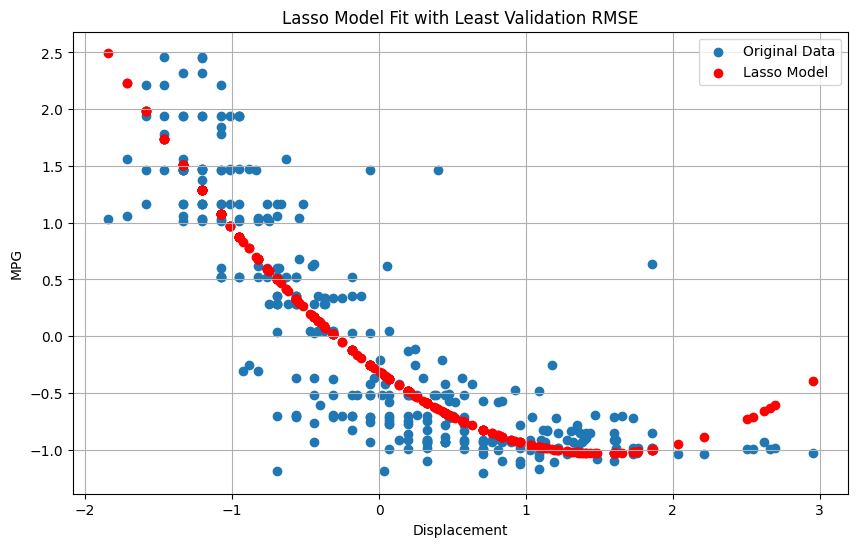

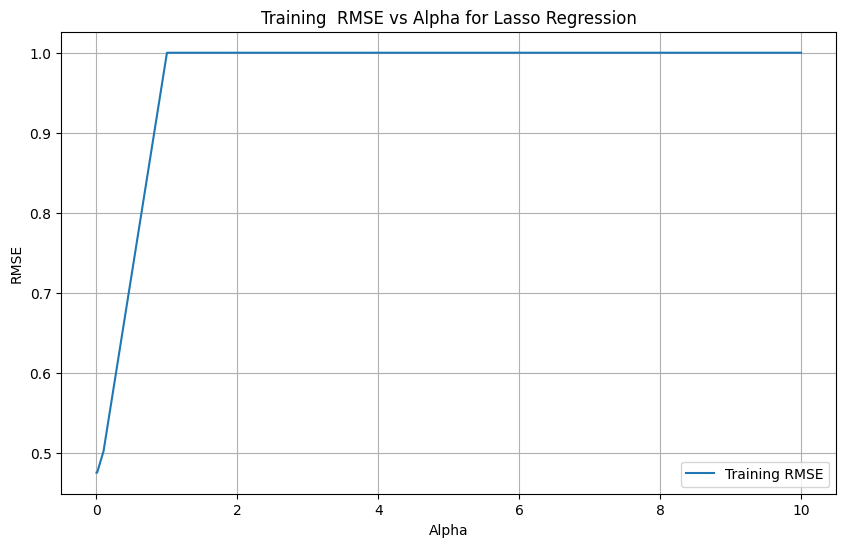

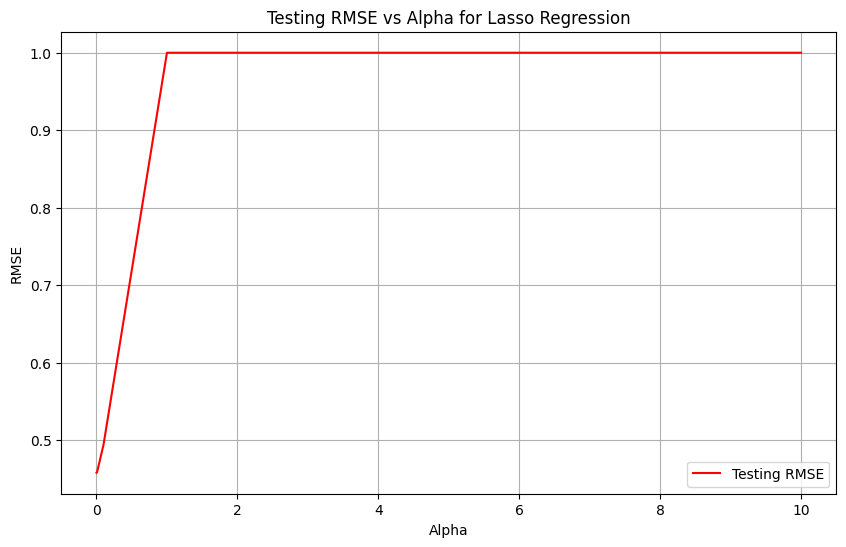

In [34]:
## YOUR CODE HERE ##



lasso_train_rmse = []
lasso_test_rmse = []

for alpha in alpha_values:

    lasso_pipeline.set_params(lasso__alpha=alpha)
    

    lasso_pipeline.fit(X_train_new, y_train_new)
    
 
    y_train_pred = lasso_pipeline.predict(X_train_new)
    y_test_pred = lasso_pipeline.predict(X_test_new)
    

    train_rmse = np.sqrt(mean_squared_error(y_train_new, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_new, y_test_pred))
    

    lasso_train_rmse.append(train_rmse)
    lasso_test_rmse.append(test_rmse)


min_rmse_index = np.argmin(lasso_test_rmse)
optimal_alpha = alpha_values[min_rmse_index]


lasso_pipeline.set_params(lasso__alpha=optimal_alpha)


lasso_pipeline.fit(X_train_new, y_train_new)


y_original_data_pred = lasso_pipeline.predict(X_train_new)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_new, y_train_new, label='Original Data')
plt.scatter(X_train_new, y_original_data_pred, color='red', label='Lasso Model')
plt.title('Lasso Model Fit with Least Validation RMSE')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_train_rmse, label='Training RMSE')
plt.title('Training  RMSE vs Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, lasso_test_rmse, label='Testing RMSE',color='red')
plt.title('Testing RMSE vs Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.show()





# **THE END :)**